In [1]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
text = "NLTK is a powerful tool for natural language processing."

# Get sentiment scores
scores = sid.polarity_scores(text)

# Print sentiment scores
print(scores)

{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6486}


In [4]:
# Extract the Date time
def date_time(s):
    pattern= r'^(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}\s*[AP]M) -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message

In [5]:
data=[]
conversation='WhatsApp Chat with CSC PENULTIMATE 🎊.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)
#if messageBuffer:  # Append the last message if messagebuffer is not empty
#    data.append([date, time, author, ''.join(messagebuffer)])

In [6]:
df = pd.DataFrame(data, columns= ['Date', 'Time', 'Contact', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
data = df.dropna()

sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\557862907.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\pc\AppData\Local\Temp\ipykernel_8892\557862907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
C:\Users\pc\AppData\Local\Temp\ipykernel_8892\557862907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Date,Time,Contact,Message,positive,negative,neutral
2,2023-07-24,6:11 PM,+234 907 237 3007,<Media omitted>,0.0,0.0,1.0
3,2023-07-24,8:44 PM,+234 909 278 2658,Is there any test tomorrow,0.0,0.0,1.0
4,2023-07-24,8:47 PM,+234 810 679 4406,Test ke?,0.0,0.0,1.0
5,2023-07-24,8:47 PM,+234 901 287 8357,I don’t think so🤔,0.0,0.0,1.0
6,2023-07-24,8:48 PM,+234 701 684 6803,<Media omitted>,0.0,0.0,1.0


## Word Cloud Of Text Data

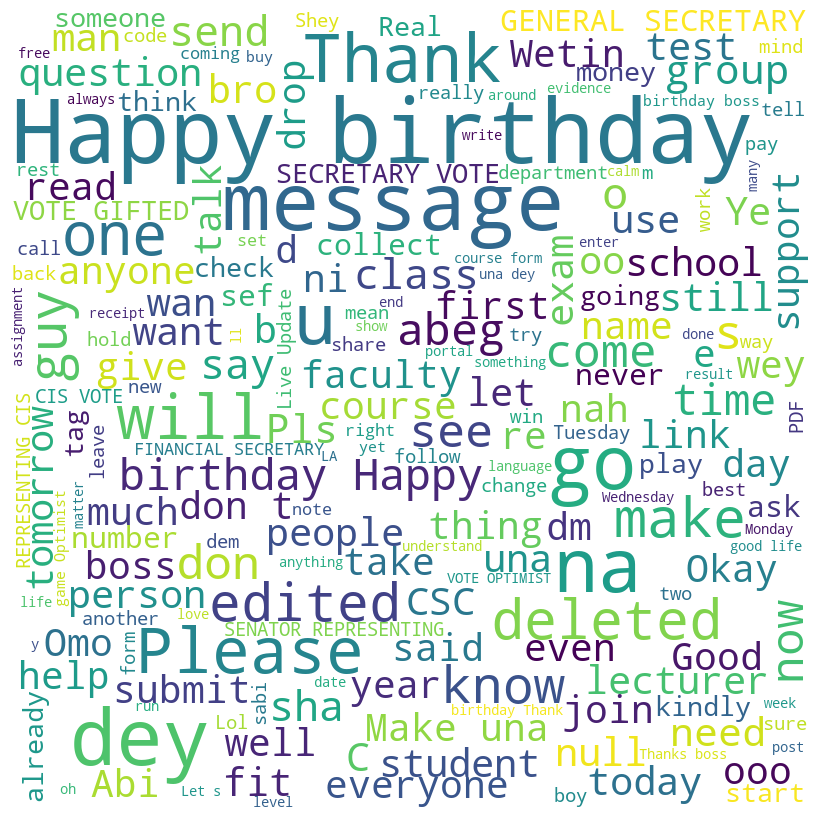

In [7]:
message = data[~data['Message'].str.contains('Media omitted')]
mess = message['Message'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=800,
                       background_color= 'white', stopwords=STOPWORDS,
                       min_font_size=10).generate(mess)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [8]:
Message_sent = data.groupby('Contact')['Message'].count()
stats = pd.DataFrame(Message_sent)
stats = stats.sort_values('Message', ascending=False)
stats.head(10)

,Message
Contact,
+234 807 772 7914,1694
+234 702 531 4841,818
+234 806 429 4069,719
Isreal,707
GODFIRST! 🦁,634
Optimistic Class Rep,577
+234 704 981 2103,574
+234 706 235 2856,489
Emmanuel,403


In [9]:
import seaborn as sns
sns.set()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129409 (\N{LION FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


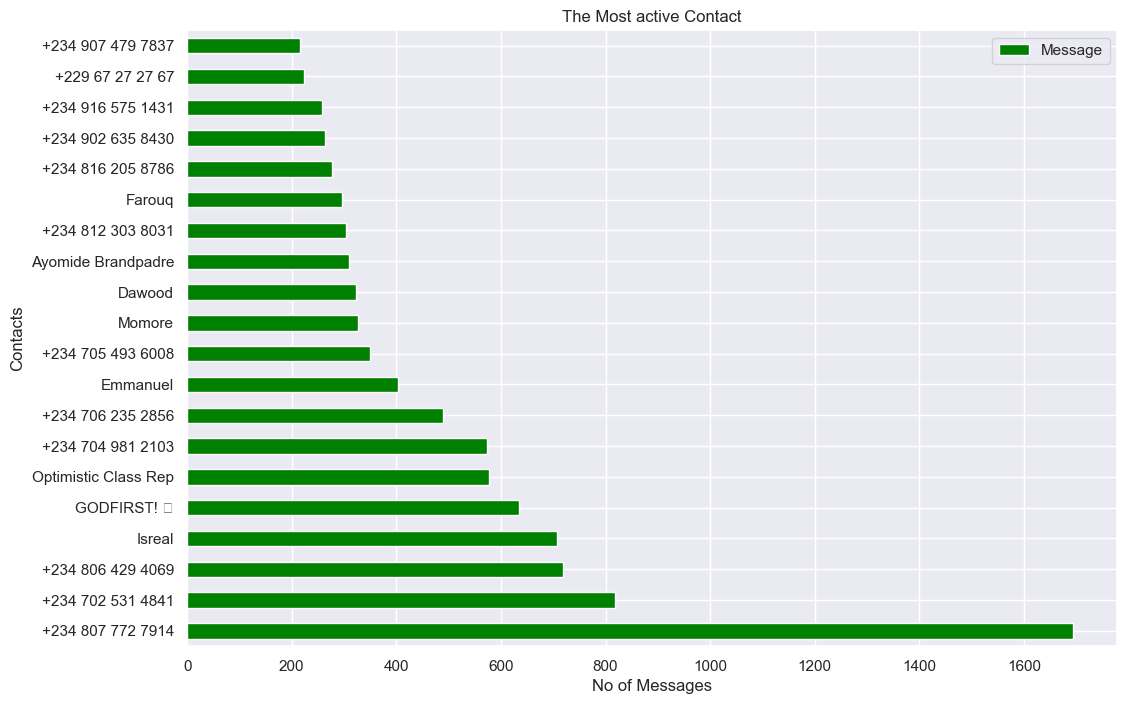

In [10]:
stats_big = stats.head(20)
stats_big.plot(kind='barh', figsize=(12,8), color='green')
plt.title('The Most active Contact')
plt.ylabel('Contacts')
plt.xlabel('No of Messages')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127374 (\N{NEGATIVE SQUARED AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129528 (\N{TEDDY BEAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127880 (\N{BALLOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


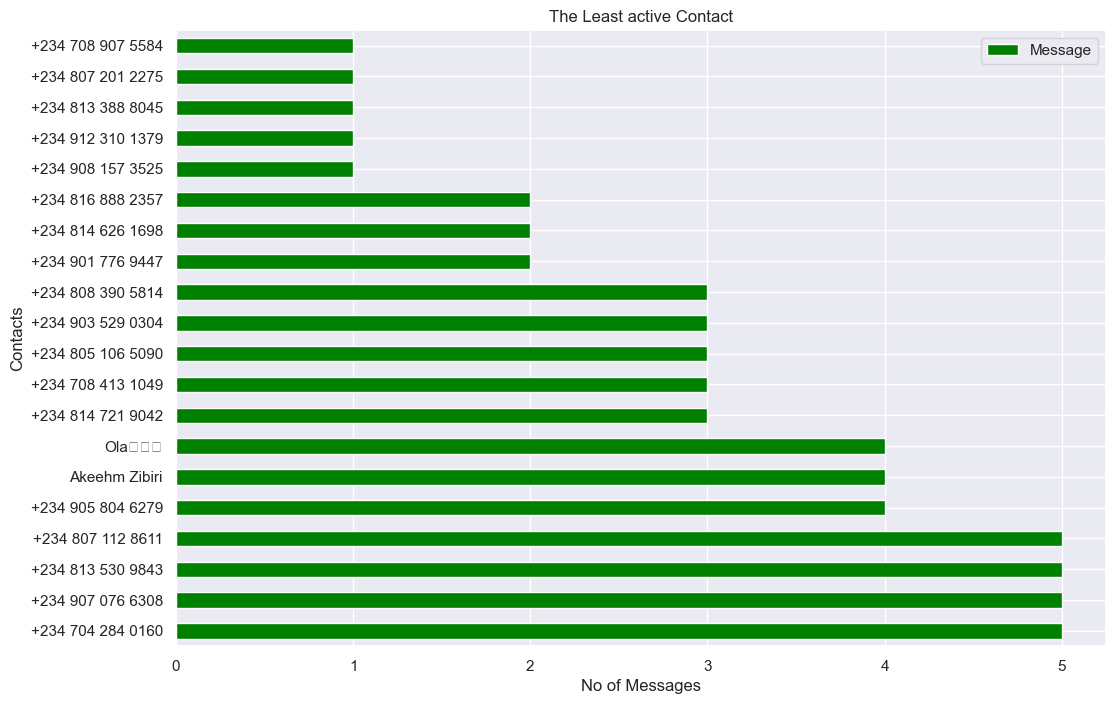

In [11]:
stats_small = stats.tail(20)
stats_small.plot(kind='barh', figsize=(12,8), color='green')
plt.title('The Least active Contact')
plt.ylabel('Contacts')
plt.xlabel('No of Messages')
plt.show()

In [16]:
def extract_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

In [18]:
import regex
data["emoji"] = data["Message"].apply(extract_emojis)
emojis = sum(data['emoji'].str.len())
data.head(20)

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\2375953075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["emoji"] = data["Message"].apply(extract_emojis)


,Date,Time,Contact,Message,positive,negative,neutral,emoji
2,2023-07-24,6:11 PM,+234 907 237 3007,<Media omitted>,0.000,0.000,1.000,[]
3,2023-07-24,8:44 PM,+234 909 278 2658,Is there any test tomorrow,0.000,0.000,1.000,[]
4,2023-07-24,8:47 PM,+234 810 679 4406,Test ke?,0.000,0.000,1.000,[]
5,2023-07-24,8:47 PM,+234 901 287 8357,I don’t think so🤔,0.000,0.000,1.000,[]
6,2023-07-24,8:48 PM,+234 701 684 6803,<Media omitted>,0.000,0.000,1.000,[]
7,2023-07-24,8:48 PM,+234 701 684 6803,We're having exams too,0.000,0.000,1.000,[]
8,2023-07-24,8:49 PM,+234 901 287 8357,<Media omitted>,0.000,0.000,1.000,[]
9,2023-07-24,8:51 PM,+234 810 679 4406,<Media omitted>,0.000,0.000,1.000,[]
10,2023-07-24,8:52 PM,+234 701 684 6803,Aje🙇🏾‍♂️🙇🏾‍♂️,0.000,0.000,1.000,"[🙇🏾, 🙇🏾]"
11,2023-07-24,9:02 PM,+234 807 772 7914,Hmmm true talk,0.583,0.000,0.417,[]


## Most Used Emoji

In [27]:
total_emojis_list = list([a for b in data.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji_dict, columns=['Emoji', 'Frequency'])
emoji_df.head(20)

,Emoji,Frequency
0,😂,800
1,😂😂,269
2,😂😂😂,164
3,🔥,142
4,😹,134
5,🏽,126
6,🏾,122
7,😊,101
8,🎉,82
9,😅,78


## Least Used Emojis

In [31]:
emoji_df.tail(20)

,Emoji,Frequency
624,😭🙏🙏,1
625,😭💔,1
626,😎😅,1
627,🐔,1
628,😅😎,1
629,😒😭😭,1
630,👍🏻,1
631,😂😂🌚,1
632,😹😹👨🏽,1
633,🏐🏐,1


In [30]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


## Hence the Overall Sentiment Of This WhatsApp Group Text Is Neutral